In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as p

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day37-handling-missing-categorical-data/train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isna().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'garage data')

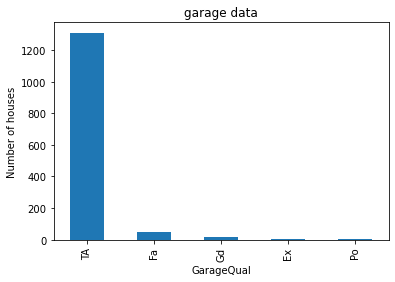

In [5]:
df["GarageQual"].value_counts().plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')
plt.title("garage data")

In [6]:
df["GarageQual"].mode()

0    TA
dtype: object

In [7]:
temp=df[df["GarageQual"]=="TA"]["SalePrice"]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

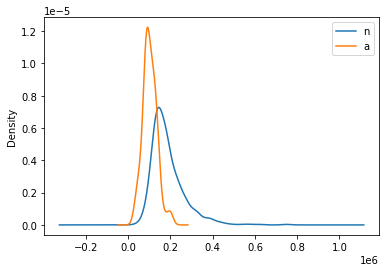

In [8]:
df[df["GarageQual"]=="TA"]["SalePrice"].plot.density()
plt.legend("ta")
df[df["GarageQual"].isna()]["SalePrice"].plot.density()
plt.legend("na")


In [9]:
df["GarageQual"]=df["GarageQual"].fillna("TA")

In [10]:
df["GarageQual"].isna().sum()

0

<AxesSubplot:>

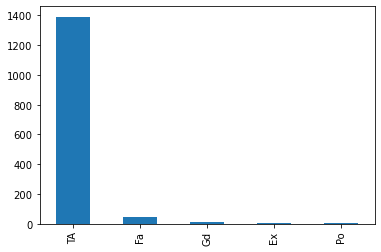

In [11]:
df["GarageQual"].value_counts().plot.bar()

<AxesSubplot:ylabel='Density'>

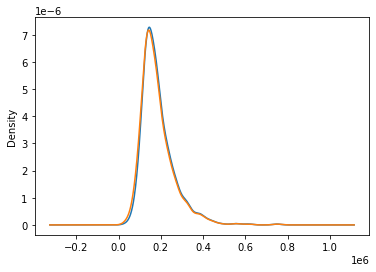

In [12]:
temp.plot(kind="kde")
df[df["GarageQual"]=="TA"]["SalePrice"].plot.density()

<AxesSubplot:>

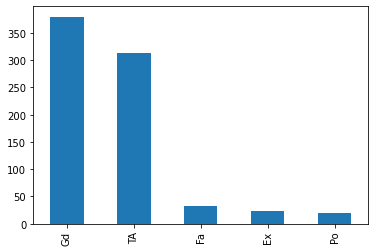

In [13]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [14]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

<IPython.core.display.Javascript object>

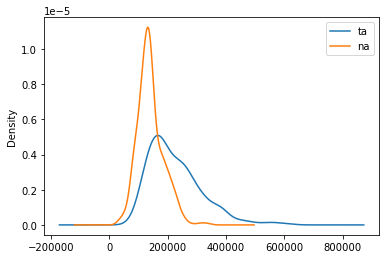

In [15]:
df[df["FireplaceQu"]=="Gd"]["SalePrice"].plot.density(label="ta")
# plt.legend("gd")
df[df['FireplaceQu'].isnull()]['SalePrice'].plot.density(label="na")
# plt.legend("na")
plt.legend()

In [16]:
temp2=df[df["FireplaceQu"]=="Gd"]["SalePrice"]

In [17]:
df["FireplaceQu"].fillna("Gd",inplace=True)

In [18]:
df["FireplaceQu"].isna().sum()

0

<AxesSubplot:ylabel='Density'>

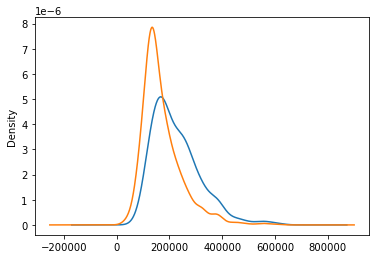

In [19]:
temp2.plot(kind="kde")
df[df["FireplaceQu"]=="Gd"]["SalePrice"].plot.density()

# Using sklearn

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [21]:

from sklearn.impute import SimpleImputer

In [22]:
imputer = SimpleImputer(strategy='most_frequent')

In [23]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [24]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)